## Nhập thư viện:

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Đọc dữ liệu:

In [2]:
df = pd.read_csv('../Datasets/data_cleaned.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually


## Phân tích nhân khẩu học:

### Lựa chọn thuộc tính:

- `Customer ID`: Xác định duy nhất mỗi khách hàng, giúp liên kết các thông tin khác với cá nhân cụ thể.
- `Age`: Tuổi của khách hàng là yếu tố cốt lõi trong việc phân khúc nhóm khách hàng theo các nhóm tuổi khác nhau.
- `Gender`: Giới tính giúp so sánh hành vi tiêu dùng giữa nam và nữ.
- `Location`: Thông tin về địa điểm cho phép phân tích theo vùng miền, thành phố hoặc khu vực, từ đó xác định các đặc điểm khu vực.
- `Subscription Status`: Mặc dù không phải trực tiếp là nhân khẩu học, nhưng trạng thái đăng ký có thể liên quan đến thói quen tiêu dùng và sự trung thành của khách hàng theo nhóm nhân khẩu học.

In [4]:
demographic_df = df[['Customer ID', 'Age', 'Gender', 'Location', 'Subscription Status']]
demographic_df.sample(5)

,Customer ID,Age,Gender,Location,Subscription Status
1493,1494,70,Male,North Dakota,No
160,161,27,Male,Texas,Yes
26,27,38,Male,Nevada,Yes
2635,2636,59,Male,Colorado,No
1531,1532,63,Male,Mississippi,No


### Lựa chọn các biểu đồ:

#### Biểu đồ **Histogram** cho thuộc tính `Age`:
- **Trực quan phân bố độ tuổi**: Histogram cho phép nhìn thấy cách các độ tuổi được phân bố, xác định các nhóm tuổi phổ biến, khoảng cách, cũng như các điểm bất thường (outliers).
- **Đơn giản và hiệu quả**: Với biểu đồ này ta có thể dễ dàng trực quan hóa mật độ dữ liệu theo từng khoảng tuổi, từ đó hỗ trợ phân tích nhân khẩu học.

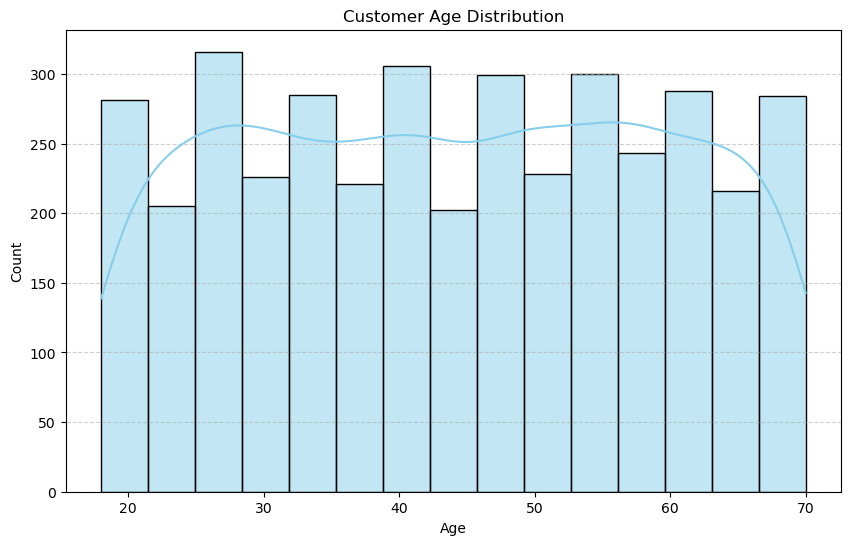

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(demographic_df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

##### Nhận xét:
Dựa trên biểu đồ histogram và đường cong mật độ KDE cho thấy:

- Phân bố khá đồng đều:
    - Mức độ tập trung ở các nhóm tuổi không chênh lệch quá lớn, chứng tỏ khách hàng trải dài trên nhiều độ tuổi.
    - Một số khoảng tuổi có số lượng nhỉnh hơn (có thể quan sát khoảng 30-40), tuy nhiên sự chênh lệch không quá rõ rệt.

- Không có cực trị (outlier) quá rõ:
    - Biểu đồ không xuất hiện những cột cực kỳ thấp hoặc cực kỳ cao, cho thấy phân bố khách hàng về tuổi khá “tròn trịa” và ổn định.

- Đường cong mật độ (KDE) “gợn sóng” nhẹ:
    - Dễ thấy rằng đường cong có dao động, nhưng nhìn chung không có đỉnh hay đáy đột biến, củng cố quan sát rằng dữ liệu về tuổi không tập trung quá nhiều vào một nhóm duy nhất.

- Hàm ý cho việc phân khúc thị trường:
    - Do không có nhóm tuổi vượt trội, chiến lược marketing hoặc xây dựng gói dịch vụ cần xem xét đến đa dạng độ tuổi.
    - Có thể cần kết hợp thêm các thuộc tính khác (giới tính, vị trí địa lý, sở thích) để phân khúc chính xác hơn.

##### Kết luận: 
- Dữ liệu tuổi khách hàng khá cân bằng trên nhiều độ tuổi, không tập trung hẳn vào một nhóm cụ thể. Điều này gợi ý rằng doanh nghiệp có tệp khách hàng rộng về độ tuổi, cần phân tích kết hợp các yếu tố khác để phân nhóm, điều chỉnh sản phẩm và chiến lược tiếp thị phù hợp.

#### Biểu đồ **cột (bar chart)** theo nhóm để phân tích mối quan hệ giữa hai thuộc tính `Gender` và `Subscription Status`:
- **Dễ so sánh**: Biểu đồ cột giúp so sánh số lượng khách hàng nam/nữ có trạng thái đăng ký khác nhau (đã đăng ký, chưa đăng ký).
- **Phân nhóm trực quan**: Nhờ vào cách biểu diễn theo nhóm (hue), có thể quan sát ngay được xu hướng đăng ký ở từng nhóm giới tính.
- **Đơn giản, trực quan**: Rất phù hợp để hiển thị dữ liệu phân loại (categorical data) và so sánh tần suất.

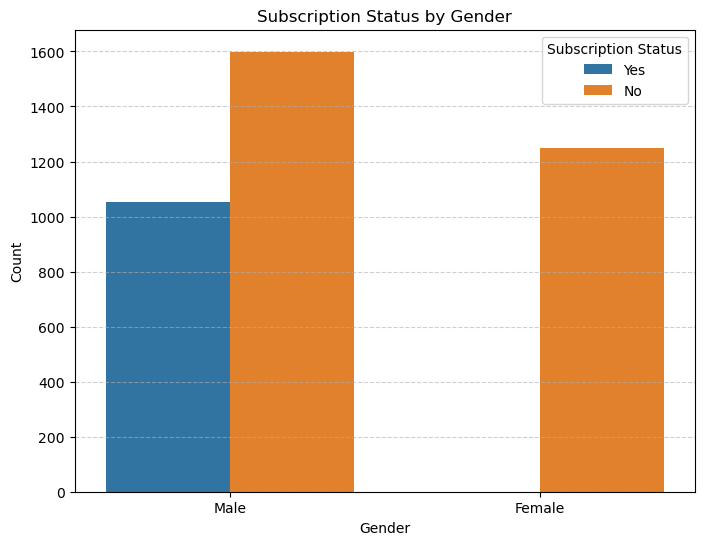

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=demographic_df, x='Gender', hue='Subscription Status')

plt.title('Subscription Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Subscription Status')
plt.show()

##### Nhận xét:
- Số lượng khách hàng Nam nhiều hơn Nữ.
- Khách hàng Nam tồn tại cả 2 trạng thái Đăng ký & Không đăng ký, trong khi đó tất cả khách hàng Nữ đều không đăng ký.
- Đối với khách hàng Nam, số lượng người không đăng ký vượt trội hơn số người đăng ký.

##### Kết luận:
- Ngoài việc số lượng người không đăng ký cao hơn rõ rệt thì việc không có khách hàng nữ nào đăng ký cũng là một điểm đáng chú ý. Điều này cho thấy chiến lược thất bại của doanh nghiệp trong việc thu hút khách hàng (đặc biệt là nữ).
- Để đưa ra các chiến lược trong tương lai, cần xác thực lại dữ liệu và điều chỉnh, cải tiến để thu hút, thúc đẩy đăng ký từ khách hàng.